In [1]:
# cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
# indir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_init/donor1"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/top"
# clone_order_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_init_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

# cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
# indir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_prefilterMerge_impute/donor1"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top/scrap"
# clone_order_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"

cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/cells_meta.tsv"
indir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/multiplex/clones_prefilterMerge_impute/donor1"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top" 
clone_order_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/clones_ranked/cloneID_rank_ncells.txt"
#ntop_clones = 8 
af_thresh = 0.001 
cov_thresh = 2 
ntop_vars = 10


ntop_clones = -1 #unused parameters

# af_thresh = 0.001
# cov_thresh = 2
# ntop_vars=10

remove_donor_vars = True

In [2]:
from os.path import join, exists, dirname
from glob import glob
import pickle
import mplh.cluster_help as ch
import mplh.fig_utils as fu

import os
import vireoSNP
import numpy as np
from scipy import sparse
from scipy.io import mmread
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
print(vireoSNP.__version__)

import pandas as pd
import seaborn as sns
from vireoSNP import Vireo
np.set_printoptions(formatter={'float': lambda x: format(x, '.5f')})

plt.rcParams['svg.fonttype'] = 'none'

fig_utils from mplh
0.5.6


In [3]:
from scipy.stats import mannwhitneyu

In [4]:
import seaborn as sns
from mplh import cluster_help as ch
from src.utils.data_io import reverse_ids


In [5]:
clone_order = pd.read_csv(clone_order_f, header=None)[0].values
top_clones = clone_order #clone_order[:ntop_clones]
top_clones

array(['1_0', '1_1', '1_2', '1_3', '1_4', '1_6', '1_7', '1_8', '1_9',
       '1_10', '1_11', '1_13', '1_12', '1_14', '1_15', '1_16', '1_17',
       '1_18', '1_20', '1_22', '1_24', '1_25', '1_21', '1_23', '1_5',
       '1_19'], dtype=object)

In [6]:
clone_order

array(['1_0', '1_1', '1_2', '1_3', '1_4', '1_6', '1_7', '1_8', '1_9',
       '1_10', '1_11', '1_13', '1_12', '1_14', '1_15', '1_16', '1_17',
       '1_18', '1_20', '1_22', '1_24', '1_25', '1_21', '1_23', '1_5',
       '1_19'], dtype=object)

In [7]:
#af_indir = join(indir, "sc_af", f"donor{DONOR}")
af_indir = indir

AF_df = pd.read_csv(join(af_indir, "af.tsv"), index_col=0, sep="\t")
DP_df = pd.read_csv(join(af_indir, "dp.tsv"), index_col=0, sep="\t")


#out_f = join(outdir, f"donor{DONOR}")


In [8]:
#donor_vars = AF_df>0.9

In [9]:
cells_meta = pd.read_csv(cells_meta_f,sep="\t", index_col=0)
cells_meta = reverse_ids(cells_meta)
cells_meta

,cloneID,clusterID,condition,donor
AAACTCGGTAGGTCTT-1_Flt3l,1_16,Erythrocyte,Flt3l,1
AACATCGGTAGCGTTT-1_Flt3l,1_7,Neutrophil,Flt3l,1
AACGGGATCCTTTGCG-1_Flt3l,1_2,Granulocyte,Flt3l,1
AACGTACCAAGAAACT-1_Flt3l,1_11,Classical Monocyte,Flt3l,1
ACAGGCCGTATCGCGC-1_Flt3l,1_12,Neutrophil,Flt3l,1
...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,1_3,HSPC 2,Input,1
TTTGTGTCAGAAAGAG-1_Input,1_6,HSPC 1,Input,1
TTTGTGTCATAGCCAT-1_Input,1_1,HSPC 1,Input,1
TTTGTGTGTCATAGAA-1_Input,1_5,HSPC 3,Input,1


## Get donor-specific variants

In [10]:
def get_high_variants(df, thresh, pct_thresh):
    """ Remove rows that have an average higher than threshold

    :param df:
    :param thresh:
    :return:
    """
    n_pct = pct_thresh*df.shape[0]
    return df.loc[:,((df>thresh).sum()>n_pct)].columns.values


donor_vars = get_high_variants(AF_df, thresh=0.8, pct_thresh=0.9)
print(f"number of donor vars: {len(donor_vars)}")


number of donor vars: 2


## Filter for clone

In [11]:
AF_df = AF_df.transpose()
DP_df = DP_df.transpose()

In [12]:
AF_df.head()

Cell,AAACGAAAGATATGAC-1_Input,AAACGAAAGTAATGTG-1_Input,AAACGAAAGTAGTCGG-1_Input,AAACGAACACATTGCA-1_Input,AAACGAAGTGGTTCTA-1_Input,AAACGAAGTGTTGTTG-1_Input,AAACTCGCAAGTCTGT-1_Input,AAACTCGCAGTGCTCG-1_Input,AAACTCGCATTTCACT-1_Input,AAACTCGGTAAGTCTC-1_Input,...,TTTGTGTAGGTTGTTC-1_Input,TTTGTGTAGGTTTCTG-1_Input,TTTGTGTAGTAGACCG-1_Input,TTTGTGTCAACTCGTA-1_Input,TTTGTGTCAAGCCAGA-1_Input,TTTGTGTCAATGACTC-1_Input,TTTGTGTCAGAAAGAG-1_Input,TTTGTGTCATAGCCAT-1_Input,TTTGTGTGTCATAGAA-1_Input,TTTGTGTTCGGGACAA-1_Input
1949A,0.000000,0.0,0.031746,0.015306,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
2514A,0.000000,0.0,0.000000,0.006329,0.009217,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00995,0.0,0.000000,0.007353,0.0,0.0,0.0
3242A,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.013333,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
3244A,0.007092,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
3630A,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.021277,0.014286,0.0,0.0,0.0


## Remove donor-specific variants

In [13]:
if remove_donor_vars:
    # Remove Donor variannts
    AF_df = AF_df.loc[~(AF_df.index.isin(donor_vars))]
    DP_df = DP_df.loc[AF_df.index, AF_df.columns] 

# Figure: 1: barplot for each clone, where x=Variant, and the % of cells (and raw) in the clone that has the variant and % of cells from other clone with variant


In [14]:
top_cells_meta = cells_meta[cells_meta["cloneID"].isin(top_clones)] 
top_cells_meta

,cloneID,clusterID,condition,donor
AAACTCGGTAGGTCTT-1_Flt3l,1_16,Erythrocyte,Flt3l,1
AACATCGGTAGCGTTT-1_Flt3l,1_7,Neutrophil,Flt3l,1
AACGGGATCCTTTGCG-1_Flt3l,1_2,Granulocyte,Flt3l,1
AACGTACCAAGAAACT-1_Flt3l,1_11,Classical Monocyte,Flt3l,1
ACAGGCCGTATCGCGC-1_Flt3l,1_12,Neutrophil,Flt3l,1
...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,1_3,HSPC 2,Input,1
TTTGTGTCAGAAAGAG-1_Input,1_6,HSPC 1,Input,1
TTTGTGTCATAGCCAT-1_Input,1_1,HSPC 1,Input,1
TTTGTGTGTCATAGAA-1_Input,1_5,HSPC 3,Input,1


In [15]:
bin_AF_df = (AF_df > af_thresh) & (DP_df > cov_thresh)
bin_AF_df

Cell,AAACGAAAGATATGAC-1_Input,AAACGAAAGTAATGTG-1_Input,AAACGAAAGTAGTCGG-1_Input,AAACGAACACATTGCA-1_Input,AAACGAAGTGGTTCTA-1_Input,AAACGAAGTGTTGTTG-1_Input,AAACTCGCAAGTCTGT-1_Input,AAACTCGCAGTGCTCG-1_Input,AAACTCGCATTTCACT-1_Input,AAACTCGGTAAGTCTC-1_Input,...,TTTGTGTAGGTTGTTC-1_Input,TTTGTGTAGGTTTCTG-1_Input,TTTGTGTAGTAGACCG-1_Input,TTTGTGTCAACTCGTA-1_Input,TTTGTGTCAAGCCAGA-1_Input,TTTGTGTCAATGACTC-1_Input,TTTGTGTCAGAAAGAG-1_Input,TTTGTGTCATAGCCAT-1_Input,TTTGTGTGTCATAGAA-1_Input,TTTGTGTTCGGGACAA-1_Input
1949A,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2514A,False,False,False,True,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3242A,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3244A,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3630A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4837A,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6456A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7598A,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7775A,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
8292A,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Create variant-clone (and non-clone) percent of cells in clone with variant

In [16]:
def calc_clone_pct(data, **kwargs):
    curr_AF_df = bin_AF_df.loc[:,data.index]
    other_curr_AF_df = bin_AF_df.loc[:, ~(bin_AF_df.columns.isin(data.index))]
    
    curr_AF_tot = curr_AF_df.sum(axis=1)
    curr_AF_pct = 100*curr_AF_tot/curr_AF_df.shape[1]
    
    other_curr_AF_tot = other_curr_AF_df.sum(axis=1)
    other_curr_AF_pct = 100*other_curr_AF_tot/other_curr_AF_df.shape[1]
        
    return pd.concat((pd.DataFrame(curr_AF_pct).rename({0:"clone_pct"}, axis=1),
               pd.DataFrame(other_curr_AF_pct).rename({0:"other_clone_pct"}, axis=1)),axis=1, 
             ignore_index=False).rename_axis("variant")
    

pct_clones_df = top_cells_meta.groupby("cloneID").apply(calc_clone_pct).reset_index()
pct_clones_df

,cloneID,variant,clone_pct,other_clone_pct
0,1_0,1949A,9.779180,7.295960
1,1_0,2514A,20.820189,15.127782
2,1_0,3242A,0.315457,1.401484
3,1_0,3244A,2.839117,1.896125
4,1_0,3630A,12.302839,8.573784
...,...,...,...,...
1477,1_9,8770T,9.600000,7.524828
1478,1_9,11761T,8.000000,11.764706
1479,1_9,12283T,10.400000,11.841100
1480,1_9,13188T,12.000000,12.032086


## Rank variants for each clone by sorting by mannwhitneyu test of allele-frequency


In [17]:
def rank_unique_vars_clone_af(clone_cells):
    clones_af = AF_df.loc[:,clone_cells.index].fillna(0)
    other_clones_af = AF_df.loc[:, ~(AF_df.columns.isin(clone_cells.index))].fillna(0)
    pvals = mannwhitneyu(clones_af, other_clones_af, alternative='greater', axis=1).pvalue
    rankings = pd.DataFrame(index=clones_af.index,data=pvals).rank(method="min").rename({0:"rank"}, axis=1) # np.argsort(pvals)
    #print(type(rankings))
    #print('rankings', rankings)

    rankings["pval"] = pvals
    rankings["rank"]= rankings["rank"].astype('int')
    #print('rankings', rankings)
    #print('rankings', rankings.head())
    rankings.index.name = "variant"
    return rankings

pvals_df = cells_meta.groupby("cloneID").apply(rank_unique_vars_clone_af).reset_index()
pvals_df

,cloneID,variant,rank,pval
0,1_0,1949A,34,0.048704
1,1_0,2514A,22,0.002902
2,1_0,3242A,52,0.947515
3,1_0,3244A,35,0.127930
4,1_0,3630A,26,0.010530
...,...,...,...,...
1477,1_9,8770T,8,0.195602
1478,1_9,11761T,44,0.920899
1479,1_9,12283T,24,0.726836
1480,1_9,13188T,16,0.565330


In [18]:
pct_pvals_df = pd.merge(pct_clones_df, pvals_df, on=["cloneID", "variant"])
pct_pvals_df

,cloneID,variant,clone_pct,other_clone_pct,rank,pval
0,1_0,1949A,9.779180,7.295960,34,0.048704
1,1_0,2514A,20.820189,15.127782,22,0.002902
2,1_0,3242A,0.315457,1.401484,52,0.947515
3,1_0,3244A,2.839117,1.896125,35,0.127930
4,1_0,3630A,12.302839,8.573784,26,0.010530
...,...,...,...,...,...,...
1477,1_9,8770T,9.600000,7.524828,8,0.195602
1478,1_9,11761T,8.000000,11.764706,44,0.920899
1479,1_9,12283T,10.400000,11.841100,24,0.726836
1480,1_9,13188T,12.000000,12.032086,16,0.565330


In [19]:
def plot_pct_bar(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    data = data.set_index("variant")
    if ntop_vars != 0:
        data = data[data['rank']<ntop_vars].sort_values("rank")
        data[["clone_pct", "other_clone_pct"]].plot.bar(ax=plt.gca())
        plt.gca().set_ylabel("% cells with variant")
    else:
        data = data.loc[(data["clone_pct"]-data["other_clone_pct"]).sort_values()[::-1].index]
        #data = data.sort_values("clone_pct")[::-1]
        #print(data["clone_pct"]-data["other_clone_pct"])
        pd.DataFrame((data["clone_pct"]-data["other_clone_pct"])).plot.bar(ax=plt.gca())
        plt.gca().set_ylabel("(% cells in clone with variant) - (%cells not in clone with variant)")
    #plt.gca().legend(loc='best') 
    return

## Figure: Barplot of percent in clone vs percent not in clone

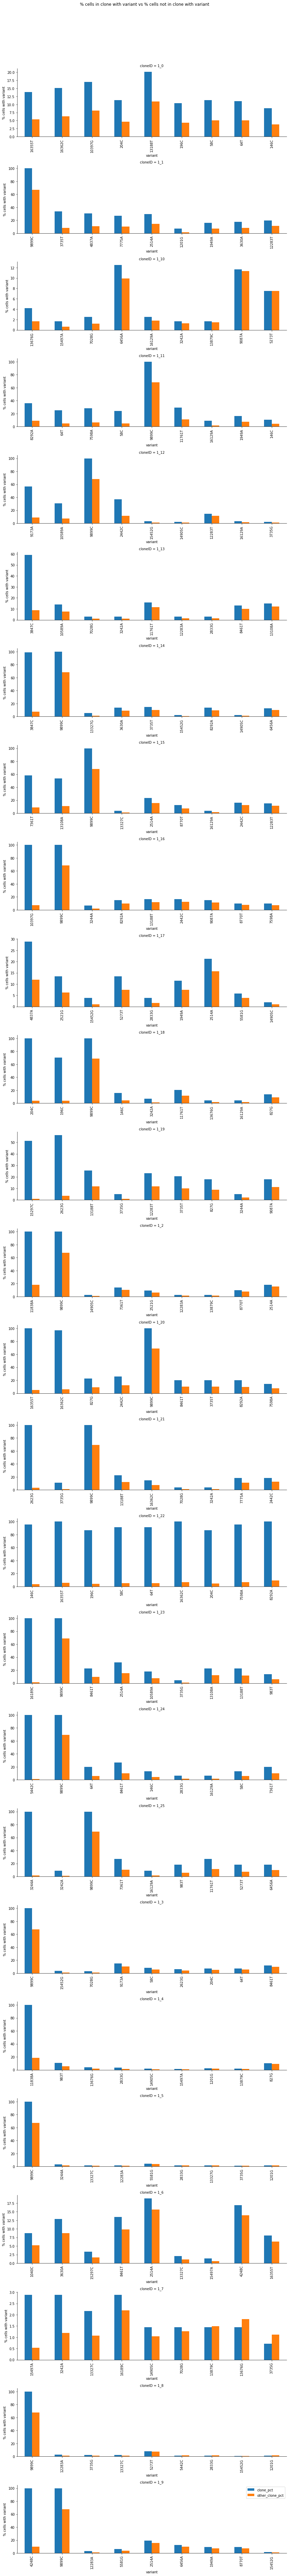

In [20]:
g = sns.FacetGrid(data=pct_pvals_df, col = "cloneID", col_wrap=1, height=4, aspect=3,
                 sharex=False, sharey=False)
g.map_dataframe(plot_pct_bar, ntop_vars=ntop_vars)
g.fig.suptitle("% cells in clone with variant vs % cells not in clone with variant", y=1.02)
#g.fig.savefig(fname=join(outdir, f"all_variants_distinct_pct_vs_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"all_variants_distinct_pct_vs_other.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)
g.fig.savefig(fname=join(outdir, f"all_variants_distinct_pct_vs_other.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


plt.tight_layout()
plt.legend()

In [21]:
def plot_violin(data, **kwargs):
    ntop_vars = kwargs.get("ntop_vars", 0)
    curr_clone = data["cloneID"].values[0]
    print('curr_clone', curr_clone)
    curr_AF_df = AF_df.loc[:,data.index]
    other_curr_AF_df = AF_df.loc[:, ~(AF_df.columns.isin(data.index))]
    
    curr_AF_df = curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    curr_AF_df["type"] = "clone"
    
    other_curr_AF_df = other_curr_AF_df.reset_index().melt(id_vars='index', var_name="cell", value_name="AF")
    other_curr_AF_df["type"] = "other"
    curr_merge_df = pd.concat((curr_AF_df, other_curr_AF_df), axis=0)
    curr_merge_df = curr_merge_df.rename({"index":"variant"}, axis=1)
    print(curr_merge_df.head())
    if ntop_vars != 0:
        print(pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)])
        if pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone)].shape[0] == 0:
            return
        curr_top_vars = pct_pvals_df[(pct_pvals_df["cloneID"]==curr_clone) & (pct_pvals_df["rank"]<=ntop_vars)].sort_values("rank")["variant"].values
        print('top vars', curr_top_vars)
        #print('before top vars',curr_merge_df.shape)
        curr_merge_df = curr_merge_df[curr_merge_df["variant"].isin(curr_top_vars)] #data[data['rank']<ntop_vars].sort_values("rank")
        #print('after top vars',curr_merge_df.shape)
        
    sns.boxenplot(data=curr_merge_df, x="variant", y="AF", hue="type", ax=plt.gca())
    return 
    
    


# Plot variants as row and clone as x AF violin

In [22]:
def long_af(ser, cells_meta):
    v = ser.name
    cells_meta["Variant"] = v
    #print('ser', pd.DataFrame(ser))
    cells_meta  = pd.merge(pd.DataFrame(ser).rename({v:"af"}, axis=1), 
             cells_meta, left_index=True, right_index=True, how='inner' )
    #cells_meta.loc[ser.index, "AF"] = ser
    return cells_meta
    
long_af = AF_df.apply(long_af, cells_meta=cells_meta, axis=1)
long_af = pd.concat(long_af.values, axis=0)

In [23]:
vars_min_over_median = pct_pvals_df.groupby("variant").apply(lambda x: min(x['rank']+1)/np.median(x['rank']+1))
vars_min_over_median = vars_min_over_median.sort_values()
vars_order = vars_min_over_median.index
vars_min_over_median


variant
3847C     0.036364
11838A    0.037736
204C      0.041237
10397G    0.043478
4248C     0.046512
16355T    0.048193
16189C    0.051948
15297C    0.053333
2623G     0.058824
146C      0.058824
4837A     0.058824
7361T     0.059701
5442C     0.060606
3244A     0.063492
8292A     0.063492
15497A    0.066667
196C      0.068966
9173A     0.068966
16362C    0.075949
64T       0.078947
1040C     0.081633
13676G    0.088889
3735T     0.095238
13108A    0.101695
3630A     0.103448
12283A    0.111111
15452G    0.113208
10589A    0.117647
7598A     0.121212
3735G     0.122449
983T      0.125000
13188T    0.129032
58C       0.131579
2521G     0.136364
8461T     0.142857
13327C    0.142857
2514A     0.147059
7028G     0.148148
3242A     0.157895
14905C    0.160000
6456A     0.166667
7775A     0.166667
2442C     0.172414
5581G     0.175439
827G      0.181818
13327G    0.195122
5273T     0.212766
11761T    0.222222
2833G     0.222222
12283T    0.230769
1949A     0.237288
1201G     0.264151
1387

In [24]:
print(len(vars_order))
vars_order = [x for x in vars_order if x in long_af["Variant"].values]
print(len(vars_order))
vars_order

57
57


['3847C',
 '11838A',
 '204C',
 '10397G',
 '4248C',
 '16355T',
 '16189C',
 '15297C',
 '2623G',
 '146C',
 '4837A',
 '7361T',
 '5442C',
 '3244A',
 '8292A',
 '15497A',
 '196C',
 '9173A',
 '16362C',
 '64T',
 '1040C',
 '13676G',
 '3735T',
 '13108A',
 '3630A',
 '12283A',
 '15452G',
 '10589A',
 '7598A',
 '3735G',
 '983T',
 '13188T',
 '58C',
 '2521G',
 '8461T',
 '13327C',
 '2514A',
 '7028G',
 '3242A',
 '14905C',
 '6456A',
 '7775A',
 '2442C',
 '5581G',
 '827G',
 '13327G',
 '5273T',
 '11761T',
 '2833G',
 '12283T',
 '1949A',
 '1201G',
 '13879C',
 '16129A',
 '8770T',
 '9087A',
 '9899C']

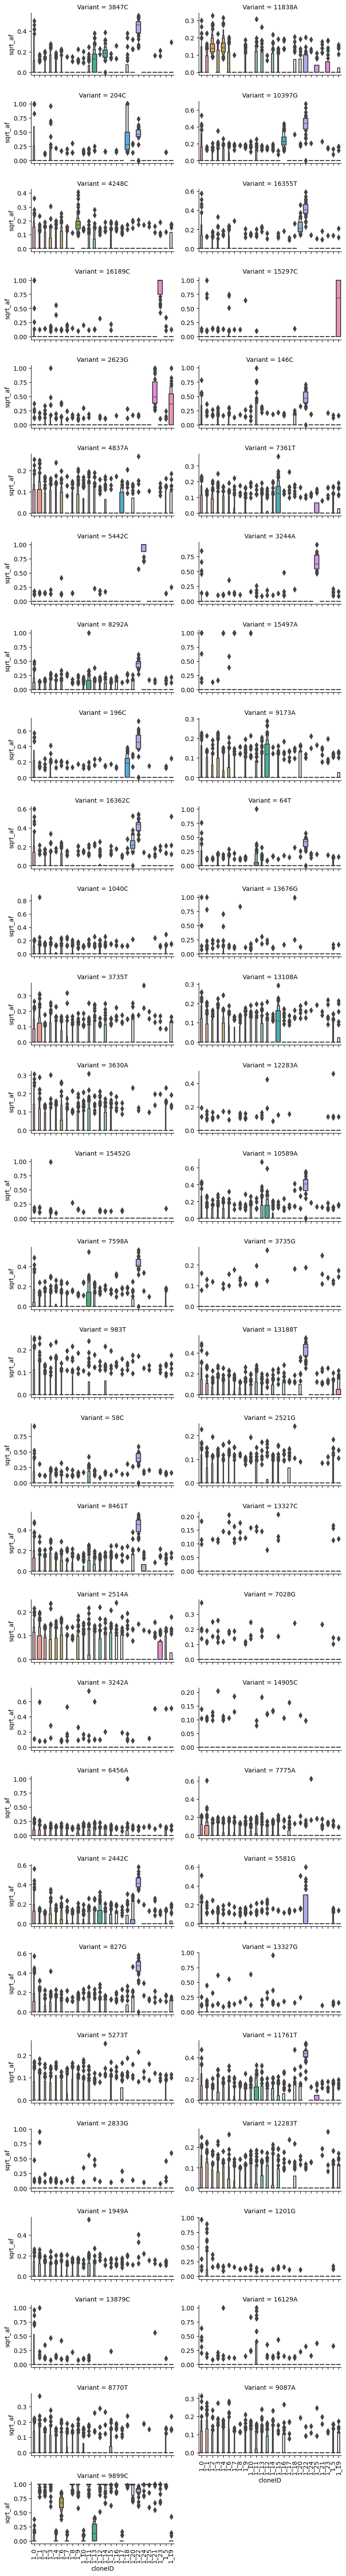

In [25]:
long_af["sqrt_af"] = np.sqrt(long_af["af"])
g = sns.catplot(data=long_af.reset_index(), x="cloneID", y="sqrt_af", col="Variant", col_wrap=2, kind='boxen', 
            sharey=False, col_order=vars_order,
            order=top_clones, height=2, aspect=2)

for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
g.fig.savefig(fname=join(outdir, 'sqrt_all_variants_af.pdf'), 
              bbox_inches='tight', pad_inches=0.5)

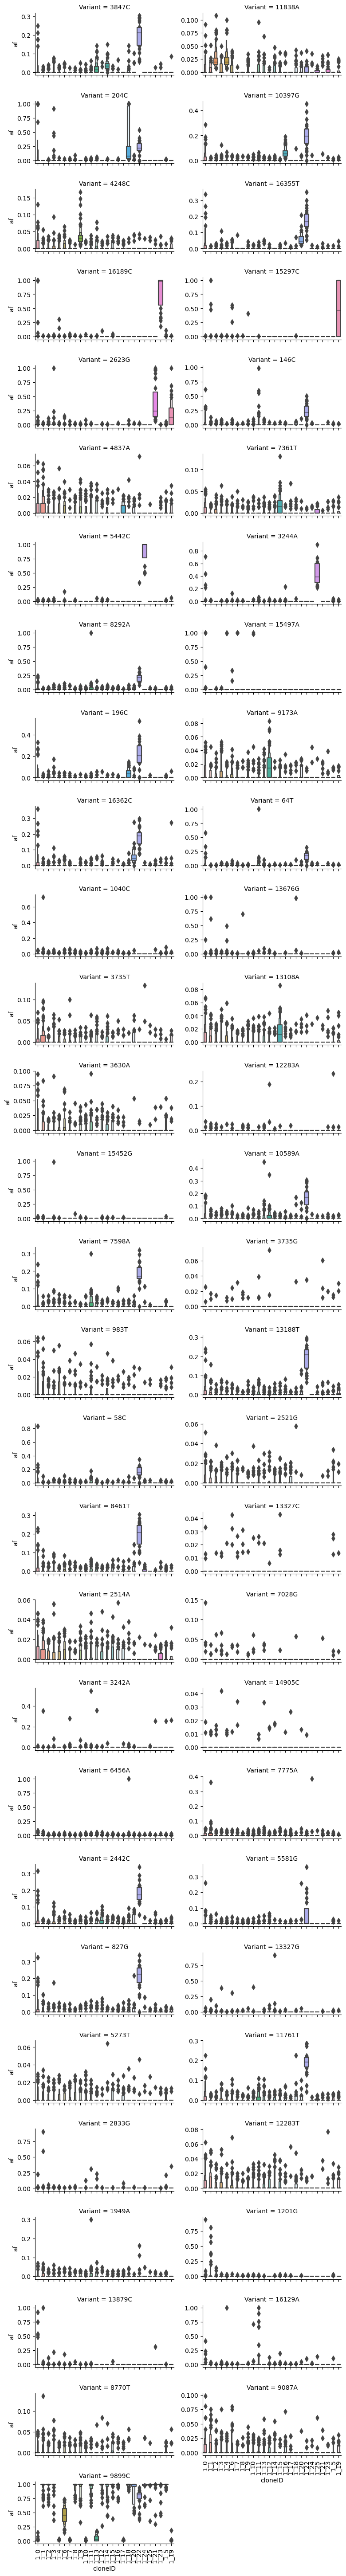

In [26]:

g = sns.catplot(data=long_af.reset_index(), x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
            sharey=False, col_order=vars_order,
            order=top_clones, height=2, aspect=2)

for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
g.fig.savefig(fname=join(outdir, 'all_variants_af.pdf'), 
              bbox_inches='tight', pad_inches=0.5)

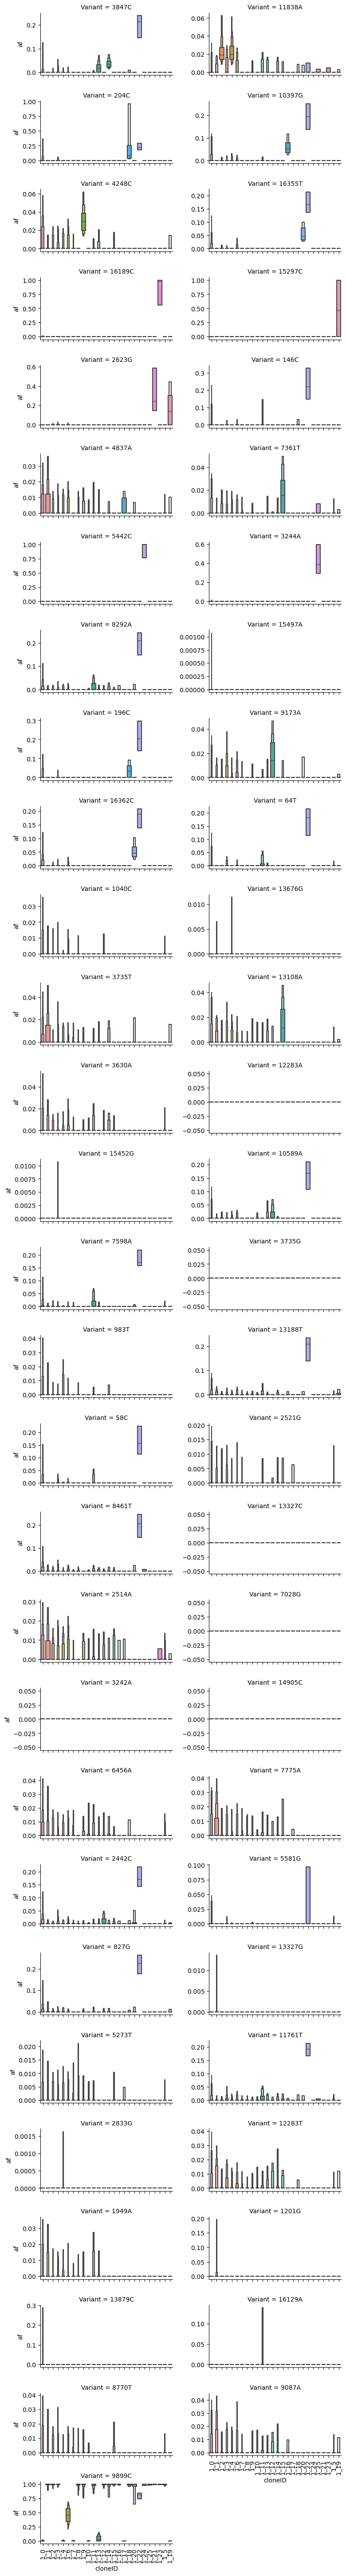

In [27]:
g = sns.catplot(data=long_af.reset_index(), x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
            sharey=False, col_order=vars_order, showfliers=False,
            order=top_clones, height=2, aspect=2)

for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
g.fig.savefig(fname=join(outdir, 'all_variants_af_noFliers.pdf'), 
              bbox_inches='tight', pad_inches=0.5)

In [28]:
nvars = len(vars_order)
nfigs = int(np.round(nvars/16))
out_fs = []
for curr_f in range(nfigs):
    end_ind = min((curr_f+1)*16, nvars)
    curr_vars = vars_order[(curr_f*16):end_ind]
    print('curr_vars', len(curr_vars), curr_vars)
    curr_file = join(outdir, f"all_variants_{curr_f+1}_{(end_ind+1)}_af.svg")
    g = sns.catplot(data=long_af.reset_index(), x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
                sharey=False, col_order=curr_vars,
                order=top_clones, height=2, aspect=2)
    for ax in g.axes.flat: 
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    g.fig.savefig(fname=curr_file, bbox_inches='tight', pad_inches=0.5)
    out_fs.append(curr_file)
    plt.close()

curr_vars 16 ['3847C', '11838A', '204C', '10397G', '4248C', '16355T', '16189C', '15297C', '2623G', '146C', '4837A', '7361T', '5442C', '3244A', '8292A', '15497A']
curr_vars 16 ['196C', '9173A', '16362C', '64T', '1040C', '13676G', '3735T', '13108A', '3630A', '12283A', '15452G', '10589A', '7598A', '3735G', '983T', '13188T']
curr_vars 16 ['58C', '2521G', '8461T', '13327C', '2514A', '7028G', '3242A', '14905C', '6456A', '7775A', '2442C', '5581G', '827G', '13327G', '5273T', '11761T']
curr_vars 9 ['2833G', '12283T', '1949A', '1201G', '13879C', '16129A', '8770T', '9087A', '9899C']


In [29]:
# try:
#     g = sns.catplot(data=long_af, x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
#                 sharey=False, col_order=vars_order,
#                 height=4, aspect=2, order=top_clones)
#     g.fig.savefig(fname=join(outdir, f"all_variants_af.svg"), dpi=500, bbox_inches='tight', pad_inches=0.5)
# except ValueError as e:

cmd = f"svg_stack.py --direction=h --margin=100 {' '.join(out_fs)} > {join(outdir, 'all_variants_af.svg')}"
print(cmd)
os.system(cmd)
    #!{cmd}

    #g.fig.savefig(fname=join(outdir, f"top_variants_af.pdf"), dpi=500, bbox_inches='tight', pad_inches=0.5)


svg_stack.py --direction=h --margin=100 /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top/all_variants_1_17_af.svg /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top/all_variants_2_33_af.svg /data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top/all_variants_3_49_af.svg /data/Mito_Trace/output/pipeline/

0

In [30]:
outdir

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/single_clones/donor1/cloneMethod_variants_prefilterMerge_impute_knn_resolution_30/clonalShift_method_clones/top'

In [31]:
long_af

,af,cloneID,clusterID,condition,donor,Variant,sqrt_af
AAACGAAAGATATGAC-1_Input,0.000000,1_11,HSPC 2,Input,1,1949A,0.000000
AAACGAAAGTAATGTG-1_Input,0.000000,1_10,HSPC 2,Input,1,1949A,0.000000
AAACGAAAGTAGTCGG-1_Input,0.031746,1_8,HSPC 1,Input,1,1949A,0.178174
AAACGAACACATTGCA-1_Input,0.015306,1_0,pre-B cells,Input,1,1949A,0.123718
AAACGAAGTGGTTCTA-1_Input,0.000000,1_10,Erythrocyte,Input,1,1949A,0.000000
...,...,...,...,...,...,...,...
TTTGTGTCAATGACTC-1_Input,0.000000,1_3,HSPC 2,Input,1,16355T,0.000000
TTTGTGTCAGAAAGAG-1_Input,0.000000,1_6,HSPC 1,Input,1,16355T,0.000000
TTTGTGTCATAGCCAT-1_Input,0.000000,1_1,HSPC 1,Input,1,16355T,0.000000
TTTGTGTGTCATAGAA-1_Input,0.000000,1_5,HSPC 3,Input,1,16355T,0.000000


In [32]:
# def min_vals(x):
#     #print(x)
#     return x.sort_values(["pval"])[:10]["variant"].values
#     #x.loc[x==x["pval"].min()].index
# top_clone_vars = pct_pvals_df.groupby("cloneID").apply(min_vals) #lambda x: x[x==x["pval"].min()].index)

# nvars = len(vars_order)
# nfigs = int(np.round(nvars/16))
# out_fs = []
# for curr_f in range(nfigs):
#     end_ind = min((curr_f+1)*16, nvars)
#     curr_vars = vars_order[(curr_f*16):end_ind]
#     print('curr_vars', len(curr_vars), curr_vars)
#     curr_file = join(outdir, f"all_variants_{curr_f+1}_{(end_ind+1)}_af_max.svg")
    
#     long_af["af"] = np.clip((long_af["af"]), 0, 0.6)
#     g = sns.catplot(data=long_af.reset_index(), x="cloneID", y="af", col="Variant", col_wrap=2, kind='boxen', 
#                 sharex=False, col_order=curr_vars, 
#                 height=2, aspect=2)
#     break
#     g.fig.savefig(fname=curr_file, bbox_inches='tight', pad_inches=0.5)
#     out_fs.append(curr_file)
#     plt.close()